In [1]:
#imports, nothing to see here
import numpy as np
np.set_printoptions(threshold=np.nan)
from scipy import stats
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 10 # КОЛ-ВО АВТОМАТОВ
arms = np.random.rand(n) # ВЕРОЯТНОСТЬ А ДЛЯ АВТОМАТА (СМ. НИЖЕ)
eps = 0.5 # ВЕРОЯТНОСТЬ СМЕНЫ АВТОМАТА (ЕСЛИ 0.1 - МЕНЯЕМ ПРИБЛИЗИТЕЛЬНО В 10% СЛУЧАЕВ
# РЕШЕНИЕ О СМЕНЕ АВТОМАТА ПРИНИМАЕТСЯ ПЕРЕД ЕГО ВЫБОРОМ)
trials = 500 # ОБЩЕЕ КОЛ-ВО ПОПЫТОК
totalMeanReward=[]

In [3]:
print arms #ВЕРОЯТНОСТЬ А = ЕСЛИ 0.07999333, АВТОМАТ, СКОРЕЕ ВСЕГО, 
         #БУДЕТ ВЫДАВАТЬ $8 И БОЛЬШЕ БАКСОВ, РЕДКО МЕНЬШЕ И Т.Д

[ 0.35169198  0.73681879  0.17056912  0.80595635  0.72417395  0.55221241
  0.12240095  0.99510816  0.1191495   0.79517634]


In [4]:
# Ф-ЦИЯ ВЫДАЧИ НАГРАДЫ ДЛЯ АВТОМАТА
def reward(prob):
    reward = 0;
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

In [5]:
np.argmax(arms) # САМЫЙ "КРУТОЙ" АВТОМАТ

7

In [6]:
#initialize memory array; has 1 row defaulted to random action index
av = np.array([np.random.randint(0,(n+1)), 0, 0]).reshape(1,3) #av = action-value
avMock=av
print "av:", av

# Ф-ЦИЯ ОПРЕДЕЛЕНИЕ НАИЛУЧШЕГО АВТОМАТА НА ДАННЫЙ МОМЕНТ
# ПО СР. АР. ВСЕХ ПОПЫТОК НА НЕМ

#greedy method to select best arm based on memory array (historical results)
def bestArm(a):
    bestArm = 0 #just default to 0
    bestMean = 0
    for u in a:
        avg = np.mean(a[np.where(a[:,0] == u[0])][:, 1]) #calc mean reward for each action
        if bestMean < avg:
            bestMean = avg
            bestArm = u[0]
            
    return bestArm

choice = bestArm(av)
print choice

av: [[1 0 0]]
0


## ИГРА 1

эпсилон (вероятность смены бандита): 0.5
количество бандитов 10
лучший бандит 7
% смен бандита% 47 %
играли на лучшем бандите % раз 55
финальная средняя прибыль за игру 7.56886227545


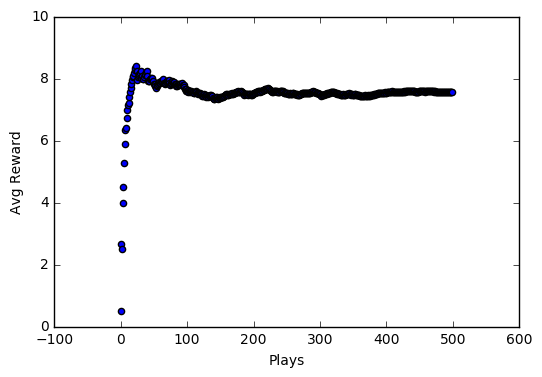

In [7]:
#print "av initial", av
greedy=0
randarm=0

plt.xlabel("Plays")
plt.ylabel("Avg Reward")
plt.ylim([0,10]) 
#plt.ylabel("% pulling best arm")
for i in range(trials):
    #a=random.random()
                                        #БРОСАЕМ "КУБИК"
    if random.random() > eps: #ЕСЛИ БОЛЬШЕ EPS, 
        # ВЫБИРАЕМ САМЫЙ ВЫИГРЫШНЫЙ НА ДАННЫЙ МОМЕНТ
        #print "greedy"
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice]), 0]]) # ДАЕТ НАМ ВЫИГРЫШ
        av = np.concatenate((av, thisAV), axis=0) 
        greedy+=1
    else: #random arm selection #ЕСЛИ МЕНЬШЕ EPS, БЕРЕМ ЛЮБОЙ
        #print "random arm"
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice]), 1]])  # ДАЕТ НАМ ВЫИГРЫШ
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        randarm+=1
    #print 'iteration', i+1
    #print 'choice aka bestArm:', choice
    #print 'thisAV:', thisAV
    #print 'av shape:', av.shape
    #print 'av:', av
    #print ""
    #calculate the percentage the correct arm is chosen (you can plot this instead of reward)
    #percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
    #calculate the mean reward
    runningMean = np.mean(av[:,1]) # СЧИТАЕМ СР. ВЫИГРЫШ НА ДАННЫЙ МОМЕНТ
    plt.scatter(i, runningMean) # РИСУЕМ ЕГО
    #plt.scatter(i, percCorrect)

#print 'список "дерганий":\n', av
#print 'greedy', greedy, 'randarm', randarm
percentRand = 100*randarm/trials

print 'эпсилон (вероятность смены бандита):', eps
print 'количество бандитов', len(arms)
print 'лучший бандит', np.argmax(arms)
print '% смен бандита%', percentRand,"%"
percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
print "играли на лучшем бандите % раз", percCorrect
print "финальная средняя прибыль за игру", np.mean(av[:,1])
totalMeanReward.append(np.mean(av[:,1]))

In [8]:
# ЕСЛИ ХОЧЕТСЯ ПРОВЕРИТЬ, ЧТО ПРОИСХОДИТ НА КАЖДОЙ ПОПЫТКЕ:
print "список попыток. Колонки: 1-номер бандита(1-10), 2-выигрыш (1-10)"
print  "В 3 колонке 0 - остаемся, 1 - меняем бандита \n"
print "Алгоритм устроен так, что после первой попытки всегда меняем на бандита с номером 0, дальше по алгоритму"
print 'лучший бандит', np.argmax(arms), 'если правильно выбран eps, то через некоторое кол-во попыток начинает постоянно'
print 'выходить', np.argmax(arms), ' в первой колонке\n', av

список попыток. Колонки: 1-номер бандита(1-10), 2-выигрыш (1-10)
В 3 колонке 0 - остаемся, 1 - меняем бандита 

Алгоритм устроен так, что после первой попытки всегда меняем на бандита с номером 0, дальше по алгоритму
лучший бандит 7 если правильно выбран eps, то через некоторое кол-во попыток начинает постоянно
выходить 7  в первой колонке
[[ 1  0  0]
 [ 0  1  0]
 [ 9  7  1]
 [ 0  2  1]
 [ 7 10  1]
 [ 3  7  1]
 [ 7 10  0]
 [ 7 10  0]
 [ 7 10  0]
 [ 3  7  1]
 [ 7 10  0]
 [ 7 10  0]
 [ 3  9  1]
 [ 1  8  1]
 [ 7 10  0]
 [ 7 10  0]
 [ 7 10  0]
 [ 7 10  0]
 [ 7 10  0]
 [ 7 10  0]
 [ 7  9  0]
 [ 7 10  0]
 [ 7 10  0]
 [ 7 10  1]
 [ 7 10  0]
 [ 5  4  1]
 [ 8  1  1]
 [ 7 10  0]
 [ 4  9  1]
 [ 7 10  0]
 [ 7 10  0]
 [ 7 10  0]
 [ 6  1  1]
 [ 7 10  0]
 [ 5  4  1]
 [ 3  9  1]
 [ 7 10  0]
 [ 7 10  0]
 [ 7 10  0]
 [ 7 10  0]
 [ 4 10  1]
 [ 6  2  1]
 [ 2  1  1]
 [ 5  7  1]
 [ 7  9  1]
 [ 7 10  0]
 [ 3  9  1]
 [ 9  9  1]
 [ 5  8  1]
 [ 2  1  1]
 [ 7 10  0]
 [ 2  2  1]
 [ 3  9  1]
 [ 0  4  1]
 [ 4  5  1

## ИГРА 2

эпсилон (вероятность смены бандита): 0.5
количество бандитов 10
лучший бандит 7
randarm% 52 %
дергаем лучшего бандита 52
финальная средняя прибыль за игру 7.60479041916


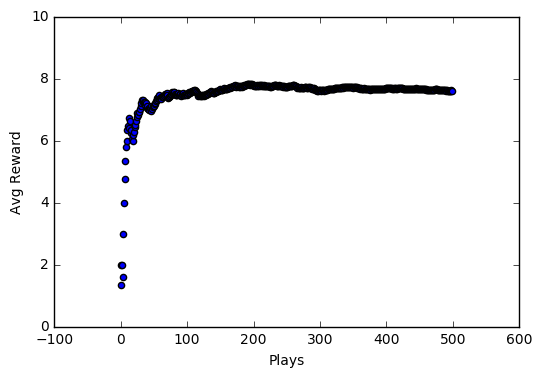

In [9]:
av=avMock
#print "av initial", av
greedy=0
randarm=0

plt.xlabel("Plays")
plt.ylabel("Avg Reward")
plt.ylim([0,10]) 
#plt.ylabel("% pulling best arm")
for i in range(trials):
    #a=random.random()
    if random.random() > eps: #greedy arm selection
        #print "greedy"
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice]), 0]])
        av = np.concatenate((av, thisAV), axis=0) 
        greedy+=1
    else: #random arm selection
        #print "random arm"
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice]), 1]]) #choice, reward 
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        randarm+=1
    #print 'iteration', i+1
    #print 'choice aka bestArm:', choice
    #print 'thisAV:', thisAV
    #print 'av shape:', av.shape
    #print 'av:', av
    #print ""
    #calculate the percentage the correct arm is chosen (you can plot this instead of reward)
    percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)
    #plt.scatter(i, percCorrect)
#print 'лучший бандит', np.argmax(arms)
#print 'список "дерганий":\n', av

#print 'greedy', greedy, 'randarm', randarm
percentRand = 100*randarm/trials
print 'эпсилон (вероятность смены бандита):', eps
print 'количество бандитов', len(arms)
print 'лучший бандит', np.argmax(arms)
print 'randarm%', percentRand,"%"
percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
print "дергаем лучшего бандита", percCorrect
print "финальная средняя прибыль за игру", np.mean(av[:,1])
totalMeanReward.append(np.mean(av[:,1]))

## ИГРА 3

эпсилон (вероятность смены бандита): 0.5
количество бандитов 10
лучший бандит 7
randarm% 49 %
дергаем лучшего бандита 52
финальная средняя прибыль за игру 7.53892215569


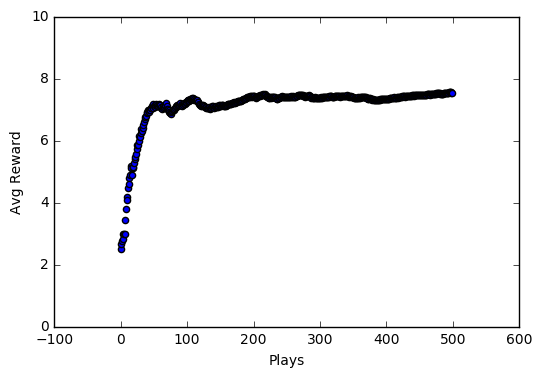

In [10]:
av=avMock
#print "av initial", av
greedy=0
randarm=0

plt.xlabel("Plays")
plt.ylabel("Avg Reward")
plt.ylim([0,10]) 
#plt.ylabel("% pulling best arm")
for i in range(trials):
    #a=random.random()
    if random.random() > eps: #greedy arm selection
        #print "greedy"
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice]), 0]])
        av = np.concatenate((av, thisAV), axis=0) 
        greedy+=1
    else: #random arm selection
        #print "random arm"
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice]), 1]]) #choice, reward 
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        randarm+=1
    #print 'iteration', i+1
    #print 'choice aka bestArm:', choice
    #print 'thisAV:', thisAV
    #print 'av shape:', av.shape
    #print 'av:', av
    #print ""
    #calculate the percentage the correct arm is chosen (you can plot this instead of reward)
    percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)
    #plt.scatter(i, percCorrect)
#print 'лучший бандит', np.argmax(arms)
#print 'список "дерганий":\n', av

#print 'greedy', greedy, 'randarm', randarm
percentRand = 100*randarm/trials
print 'эпсилон (вероятность смены бандита):', eps
print 'количество бандитов', len(arms)
print 'лучший бандит', np.argmax(arms)
print 'randarm%', percentRand,"%"
percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
print "дергаем лучшего бандита", percCorrect
print "финальная средняя прибыль за игру", np.mean(av[:,1])
totalMeanReward.append(np.mean(av[:,1]))

## ИГРА 4

эпсилон (вероятность смены бандита): 0.5
количество бандитов 10
лучший бандит 7
randarm% 52 %
дергаем лучшего бандита 43
финальная средняя прибыль за игру 7.2255489022


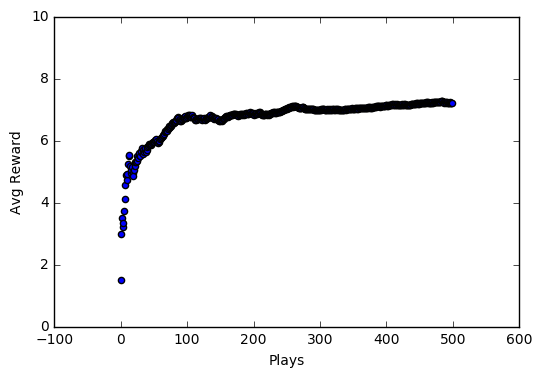

In [11]:
av=avMock
#print "av initial", av
greedy=0
randarm=0

plt.xlabel("Plays")
plt.ylabel("Avg Reward")
plt.ylim([0,10]) 
#plt.ylabel("% pulling best arm")
for i in range(trials):
    #a=random.random()
    if random.random() > eps: #greedy arm selection
        #print "greedy"
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice]), 0]])
        av = np.concatenate((av, thisAV), axis=0) 
        greedy+=1
    else: #random arm selection
        #print "random arm"
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice]), 1]]) #choice, reward 
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        randarm+=1
    #print 'iteration', i+1
    #print 'choice aka bestArm:', choice
    #print 'thisAV:', thisAV
    #print 'av shape:', av.shape
    #print 'av:', av
    #print ""
    #calculate the percentage the correct arm is chosen (you can plot this instead of reward)
    percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)
    #plt.scatter(i, percCorrect)
#print 'лучший бандит', np.argmax(arms)
#print 'список "дерганий":\n', av

#print 'greedy', greedy, 'randarm', randarm
percentRand = 100*randarm/trials
print 'эпсилон (вероятность смены бандита):', eps
print 'количество бандитов', len(arms)
print 'лучший бандит', np.argmax(arms)
print 'randarm%', percentRand,"%"
percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
print "дергаем лучшего бандита", percCorrect
print "финальная средняя прибыль за игру", np.mean(av[:,1])
totalMeanReward.append(np.mean(av[:,1]))

## ИГРА 5

эпсилон (вероятность смены бандита): 0.5
количество бандитов 10
лучший бандит 7
randarm% 49 %
дергаем лучшего бандита 52
финальная средняя прибыль за игру 7.48103792415


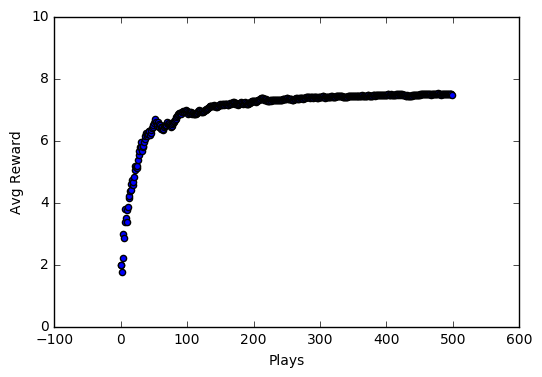

In [12]:
av=avMock
#print "av initial", av
greedy=0
randarm=0

plt.xlabel("Plays")
plt.ylabel("Avg Reward")
plt.ylim([0,10]) 
#plt.ylabel("% pulling best arm")
for i in range(trials):
    #a=random.random()
    if random.random() > eps: #greedy arm selection
        #print "greedy"
        choice = bestArm(av)
        thisAV = np.array([[choice, reward(arms[choice]), 0]])
        av = np.concatenate((av, thisAV), axis=0) 
        greedy+=1
    else: #random arm selection
        #print "random arm"
        choice = np.where(arms == np.random.choice(arms))[0][0]
        thisAV = np.array([[choice, reward(arms[choice]), 1]]) #choice, reward 
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        randarm+=1
    #print 'iteration', i+1
    #print 'choice aka bestArm:', choice
    #print 'thisAV:', thisAV
    #print 'av shape:', av.shape
    #print 'av:', av
    #print ""
    #calculate the percentage the correct arm is chosen (you can plot this instead of reward)
    percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    plt.scatter(i, runningMean)
    #plt.scatter(i, percCorrect)
#print 'лучший бандит', np.argmax(arms)
#print 'список попыток. В последней колонке 0 - остаемся, 1 - меняем', av

#print 'greedy', greedy, 'randarm', randarm
percentRand = 100*randarm/trials
print 'эпсилон (вероятность смены бандита):', eps
print 'количество бандитов', len(arms)
print 'лучший бандит', np.argmax(arms)
print 'randarm%', percentRand,"%"
percCorrect = 100*len(av[np.where(av[:,0] == np.argmax(arms))])/len(av)
print "дергаем лучшего бандита", percCorrect
print "финальная средняя прибыль за игру", np.mean(av[:,1])
totalMeanReward.append(np.mean(av[:,1]))

## ВСЕГО ЗА ИГРЫ

In [13]:
print "eps (веротность смены бандита):", eps
print "попыток в каждой игре:", trials
print 'кол-во бандитов в игре:', n
print 'СРЕДНИЙ ВЫИГРЫШ ЗА 5 ИГР:', np.mean(totalMeanReward)

eps (веротность смены бандита): 0.5
попыток в каждой игре: 500
кол-во бандитов в игре: 10
СРЕДНИЙ ВЫИГРЫШ ЗА 5 ИГР: 7.48383233533
